<a href="https://colab.research.google.com/github/FabianoAlexandre/MBTC-TNT-Application-IOT/blob/master/Desafio7_TNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [81]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [82]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /usr/local/lib/python3.6/dist-packages (1.2.0)


In [83]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [84]:
!pip install Cloudant

In [85]:
from cloudant import Cloudant
u = 'fa8daf0c-2837-4d21-b071-abe0bd98ce7f-bluemix'
p = 'e0a6a7699e780942a75414dd8dd8c8fc250791449b2f4b1b9aca1e21a5c48c4f'
a = 'fa8daf0c-2837-4d21-b071-abe0bd98ce7f-bluemix'
client = Cloudant(u, p, account=a, connect=True, auto_renew=True)

In [86]:
db = client['fabiano-iot']

In [87]:
response = db.all_docs(limit=1000, include_docs=True)

docs = []
for r in response['rows']:
  docs.append(r['doc'])
type(docs)

list

<hr>

## Download dos conjuntos de dados em formato .csv

In [88]:
import pandas as pd
df_training_dataset = pd.DataFrame(data=docs)
df_training_dataset.tail()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
995,0a73ea7e2930072d2fbcca71810cb9e3,1-d5f50d0775ab6ba223a7a17d0643e571,2019-5-19,São Joaquim,-23.5618,-46.6389,33950,86,37,54,7,43,6,43,33,REABASTECER,12739
996,0a73ea7e2930072d2fbcca71810fa865,1-9c3bfbcefb7ae1e428d6678c56f93f6d,2019-7-7,São Joaquim,-23.5618,-46.6389,32906,56,17,21,23,25,22,13,24,NORMAL,12787
997,0a73ea7e2930072d2fbcca718114ad4b,1-849859482bf13a6b78b6a34d3d41a2e8,2018-7-9,Ana Rosa,-23.5813,-46.6383,64436,72,24,13,39,23,10,20,35,NORMAL,11709
998,0a73ea7e2930072d2fbcca71811a7a5d,1-ba4583563c757c8b8039b682316af194,2018-2-17,São Judas,-23.6255,-46.6411,14450,78,65,15,9,25,26,19,6,REABASTECER,13007
999,0a73ea7e2930072d2fbcca71811b68c7,1-b5fe10df4aaaf92117e13fb6e99e96ed,2018-11-15,Ana Rosa,-23.5813,-46.6383,64735,4,8,55,41,19,28,30,43,REABASTECER,11835


#Verificando se ha dados missing values


In [90]:
df_training_dataset.isna().sum()

_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64

In [91]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           1000 non-null   object
 1   _rev          1000 non-null   object
 2   Tempo         1000 non-null   object
 3   Estação       1000 non-null   object
 4   LAT           1000 non-null   object
 5   LONG          1000 non-null   object
 6   Movimentação  1000 non-null   object
 7   Original_473  1000 non-null   object
 8   Original_269  1000 non-null   object
 9   Zero          1000 non-null   object
 10  Maçã-Verde    1000 non-null   object
 11  Tangerina     1000 non-null   object
 12  Citrus        1000 non-null   object
 13  Açaí-Guaraná  1000 non-null   object
 14  Pêssego       1000 non-null   object
 15  TARGET        1000 non-null   object
 16  row           1000 non-null   int64 
dtypes: int64(1), object(16)
memory usage: 132.9+ KB


In [92]:
df_training_dataset.nunique()


_id             1000
_rev             975
Tempo            555
Estação           25
LAT               25
LONG              25
Movimentação     969
Original_473      81
Original_269      65
Zero              63
Maçã-Verde        43
Tangerina         42
Citrus            43
Açaí-Guaraná      42
Pêssego           42
TARGET             2
row              975
dtype: int64

In [94]:
df_training_dataset['TargetNumber'] = df_training_dataset['TARGET'].map({"NORMAL" : 0, "REABASTECER" : 1})

In [95]:
df_training_dataset.head()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row,TargetNumber
0,011aab6aff3393577a24fba841000e67,1-e20d2100ab05f7aa3d1a9350b4387ade,2018-3-12,Brás,-23.5451,-46.6162,71279,60,61,32,32,18,31,11,3,NORMAL,4392,0
1,011aab6aff3393577a24fba841001b06,1-24a370af81e42c9b47d6da14bf5e945a,2019-7-16,São Judas,-23.6255,-46.6411,17011,55,20,8,18,12,33,3,6,NORMAL,13516,0
2,011aab6aff3393577a24fba84101dbea,1-08b66ddd664e0b6d63a88fa007c8265b,2019-8-11,São Judas,-23.6255,-46.6411,15394,75,6,46,15,40,36,37,41,REABASTECER,13541,1
3,011aab6aff3393577a24fba8410469dd,1-06e01c39938a1337cb0246a42c90e7a4,2018-6-4,Brás,-23.5451,-46.6162,71439,58,12,65,22,12,6,17,22,NORMAL,4474,0
4,011aab6aff3393577a24fba841060ebd,1-61d516d520735b354c043a187faf2f72,2018-2-28,São Judas,-23.6255,-46.6411,17396,44,9,18,18,23,43,18,5,NORMAL,13018,0


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [96]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [97]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
TargetNumber    0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
TargetNumber    0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [98]:
df_training_dataset_imputed.tail()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row,TargetNumber
995,0a73ea7e2930072d2fbcca71810cb9e3,1-d5f50d0775ab6ba223a7a17d0643e571,2019-5-19,São Joaquim,-23.5618,-46.6389,33950,86,37,54,7,43,6,43,33,REABASTECER,12739,1
996,0a73ea7e2930072d2fbcca71810fa865,1-9c3bfbcefb7ae1e428d6678c56f93f6d,2019-7-7,São Joaquim,-23.5618,-46.6389,32906,56,17,21,23,25,22,13,24,NORMAL,12787,0
997,0a73ea7e2930072d2fbcca718114ad4b,1-849859482bf13a6b78b6a34d3d41a2e8,2018-7-9,Ana Rosa,-23.5813,-46.6383,64436,72,24,13,39,23,10,20,35,NORMAL,11709,0
998,0a73ea7e2930072d2fbcca71811a7a5d,1-ba4583563c757c8b8039b682316af194,2018-2-17,São Judas,-23.6255,-46.6411,14450,78,65,15,9,25,26,19,6,REABASTECER,13007,1
999,0a73ea7e2930072d2fbcca71811b68c7,1-b5fe10df4aaaf92117e13fb6e99e96ed,2018-11-15,Ana Rosa,-23.5813,-46.6383,64735,4,8,55,41,19,28,30,43,REABASTECER,11835,1


In [109]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['_rev', '_id', 'Estação', 'Tempo', 'LAT', 'LONG', 'Movimentação', 'row'], inplace=False)

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [111]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Original_473','Original_269','Zero','Maçã-Verde','Tangerina','Citrus','Açaí-Guaraná','Pêssego'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,TargetNumber
995,86,37,54,7,43,6,43,33,REABASTECER,1
996,56,17,21,23,25,22,13,24,NORMAL,0
997,72,24,13,39,23,10,20,35,NORMAL,0
998,78,65,15,9,25,26,19,6,REABASTECER,1
999,4,8,55,41,19,28,30,43,REABASTECER,1


In [113]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Original_473  1000 non-null   object
 1   Original_269  1000 non-null   object
 2   Zero          1000 non-null   object
 3   Maçã-Verde    1000 non-null   object
 4   Tangerina     1000 non-null   object
 5   Citrus        1000 non-null   object
 6   Açaí-Guaraná  1000 non-null   object
 7   Pêssego       1000 non-null   object
 8   TARGET        1000 non-null   object
 9   TargetNumber  1000 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 78.2+ KB


In [114]:
df_training[['Original_473','Original_269','Zero','Maçã-Verde','Tangerina','Citrus','Açaí-Guaraná','Pêssego']] = df_training[['Original_473','Original_269','Zero','Maçã-Verde','Tangerina','Citrus','Açaí-Guaraná','Pêssego']].apply(pd.to_numeric)

In [115]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Original_473  1000 non-null   int64 
 1   Original_269  1000 non-null   int64 
 2   Zero          1000 non-null   int64 
 3   Maçã-Verde    1000 non-null   int64 
 4   Tangerina     1000 non-null   int64 
 5   Citrus        1000 non-null   int64 
 6   Açaí-Guaraná  1000 non-null   int64 
 7   Pêssego       1000 non-null   int64 
 8   TARGET        1000 non-null   object
 9   TargetNumber  1000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 78.2+ KB


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [116]:
df_training.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET', 'TargetNumber'],
      dtype='object')

In [117]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TargetNumber'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [118]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.70, random_state=133)

### Treinando uma árvore de decisão

In [119]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

### Fazendo previsões na amostra de teste

In [120]:
y_pred = dtc.predict(X_test)
print(y_pred)

['REABASTECER' 'NORMAL' 'REABASTECER' 'REABASTECER' 'REABASTECER'
 'REABASTECER' 'NORMAL' 'REABASTECER' 'REABASTECER' 'NORMAL' 'REABASTECER'
 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL'
 'REABASTECER' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'REABASTECER' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'REABASTECER' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'REABASTECER' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL'
 'REABASTECER' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL' 'REABASTECER'
 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL'
 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL'
 'REABASTECER' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'REABASTECER' 'REABASTECER' 'REABASTECER' 'REABASTECER'
 'NORMAL' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL

### Analisando a qualidade do modelo através da matriz de confusão

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

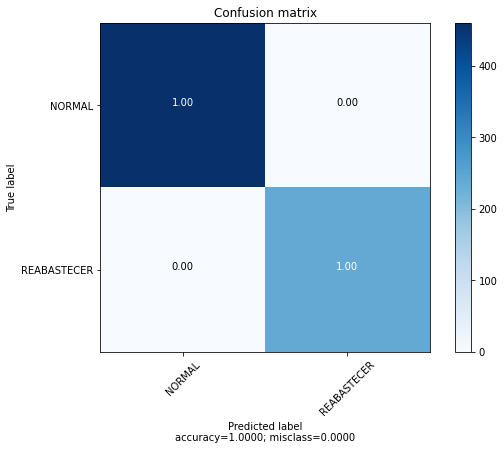

In [122]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [72]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-15 05:42:56--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

to_be_scored.csv        [ <=>                ]  68.64K  --.-KB/s    in 0.01s   

2020-09-15 05:42:56 (5.68 MB/s) - ‘to_be_scored.csv’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [73]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [ ]:
df_to_be_scored.info()

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [ ]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [ ]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
